# 1. Problem

Can we know how much charges are incurred based on several factors?

# 2. Data 

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

Data source: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data

# 3. Evaluation 

# 4. Features

Features:

1. Age: The insured person's age.

2. Sex: Gender (male or female) of the insured.

3. BMI (Body Mass Index): A measure of body fat based on height and weight.

4. Children: The number of dependents covered.

5. Smoker: Whether the insured is a smoker (yes or no).

6. Region: The geographic area of coverage.


Target:

Charges: The medical insurance costs incurred by the insured person.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data 

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Profilling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

In [7]:
df.duplicated().sum()

1

In [8]:
# let s view the duplicated data
duplicated = df[df.duplicated(keep=False)]
print(duplicated)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
# there is one duplicated data so we need to drop it

df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1337, 7)

## Exploratory data analysis

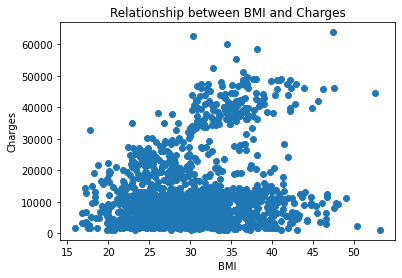

In [12]:
plt.scatter(df.bmi,df.charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges');

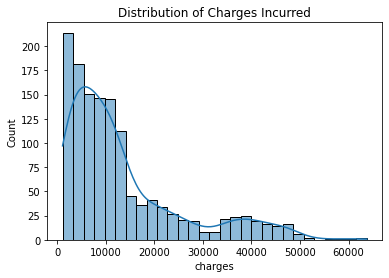

In [13]:
sns.histplot(df.charges,kde=True)
plt.title('Distribution of Charges Incurred');

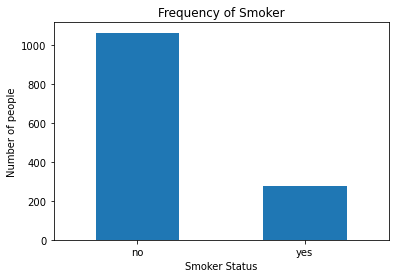

In [14]:
df.smoker.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Smoker Status')
plt.ylabel('Number of people')
plt.title('Frequency of Smoker');

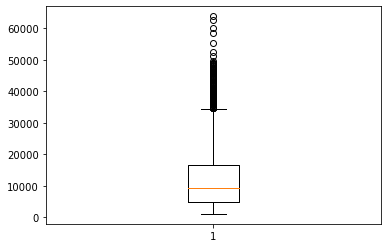

In [15]:
plt.boxplot(df.charges);

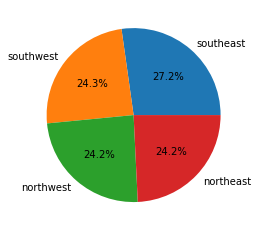

In [16]:
labels = ['southeast','southwest','northwest','northeast']

plt.pie(df.region.value_counts(),autopct='%1.1f%%',labels=labels);

### Correlation analysis

In [17]:
corr_matr=df.corr().round(2)
corr_matr

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


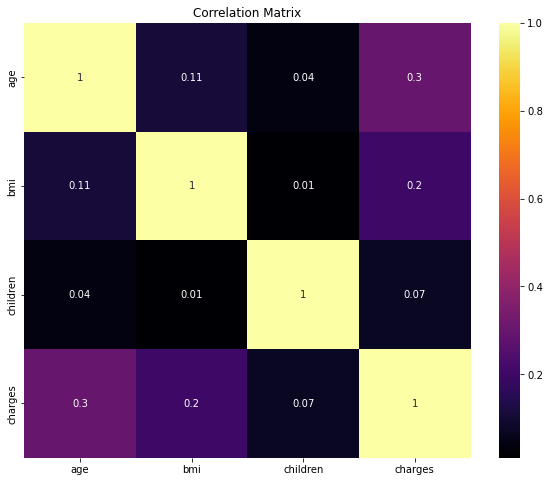

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matr,annot=True,cmap='inferno')
plt .title('Correlation Matrix');

Before modelling, the categorical data type need to convert using one hot encoding or pd.dummies

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
df = pd.get_dummies(df,columns=['sex','smoker','region','children'])
df

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1335,18,36.850,1629.83350,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1336,21,25.800,2007.94500,1,0,1,0,0,0,0,1,1,0,0,0,0,0


# 5. Modelling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor


models = {
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'XGBRFRegressor':XGBRFRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'LGBMRegressor':LGBMRegressor(),
}


def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    model_scores = {}
    
    for name,model in models.items():
        
        np.random.seed(42)
        
        model.fit(X_train,y_train)
        
        y_preds = model.predict(X_test)
        
        model_scores[name] = model.score(X_test,y_test)
                
    return model_scores
    

In [22]:
X = df.drop('charges',axis=1)
y = df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Learning rate set to 0.041377
0:	learn: 11963.3163084	total: 138ms	remaining: 2m 17s
1:	learn: 11633.8151994	total: 140ms	remaining: 1m 9s
2:	learn: 11289.3359195	total: 141ms	remaining: 46.8s
3:	learn: 10928.5891319	total: 142ms	remaining: 35.3s
4:	learn: 10600.0501273	total: 143ms	remaining: 28.4s
5:	learn: 10330.6199319	total: 144ms	remaining: 23.9s
6:	learn: 10025.6686419	total: 146ms	remaining: 20.7s
7:	learn: 9731.6641203	total: 147ms	remaining: 18.2s
8:	learn: 9447.0498378	total: 148ms	remaining: 16.3s
9:	learn: 9199.6707324	total: 149ms	remaining: 14.8s
10:	learn: 8968.6349111	total: 151ms	remaining: 13.6s
11:	learn: 8732.3328105	total: 153ms	remaining: 12.6s
12:	learn: 8518.9526720	total: 154ms	remaining: 11.7s
13:	learn: 8312.1927276	total: 156ms	remaining: 11s
14:	learn: 8101.1763615	total: 157ms	remaining: 10.3s
15:	learn: 7899.9416097	total: 159ms	remaining: 9.78s
16:	learn: 7720.4687581	total: 161ms	remaining: 9.3s
17:	learn: 7547.6798759	total: 162ms	remaining: 8.82s
18:

289:	learn: 3593.8463048	total: 521ms	remaining: 1.28s
290:	learn: 3591.2765859	total: 523ms	remaining: 1.27s
291:	learn: 3589.0997458	total: 524ms	remaining: 1.27s
292:	learn: 3587.6648433	total: 526ms	remaining: 1.27s
293:	learn: 3584.1457180	total: 527ms	remaining: 1.26s
294:	learn: 3581.3015493	total: 528ms	remaining: 1.26s
295:	learn: 3579.4523039	total: 529ms	remaining: 1.26s
296:	learn: 3579.0463460	total: 531ms	remaining: 1.25s
297:	learn: 3578.3326233	total: 532ms	remaining: 1.25s
298:	learn: 3576.1331912	total: 533ms	remaining: 1.25s
299:	learn: 3573.9678040	total: 534ms	remaining: 1.25s
300:	learn: 3572.5467707	total: 535ms	remaining: 1.24s
301:	learn: 3571.9013451	total: 537ms	remaining: 1.24s
302:	learn: 3569.7650779	total: 538ms	remaining: 1.24s
303:	learn: 3565.9848624	total: 540ms	remaining: 1.24s
304:	learn: 3563.8587218	total: 541ms	remaining: 1.23s
305:	learn: 3563.4735322	total: 542ms	remaining: 1.23s
306:	learn: 3561.6795393	total: 543ms	remaining: 1.23s
307:	learn

572:	learn: 3067.6361745	total: 867ms	remaining: 646ms
573:	learn: 3066.4854269	total: 868ms	remaining: 644ms
574:	learn: 3065.1925808	total: 869ms	remaining: 643ms
575:	learn: 3064.0920438	total: 871ms	remaining: 641ms
576:	learn: 3061.5842390	total: 872ms	remaining: 639ms
577:	learn: 3057.6376161	total: 873ms	remaining: 637ms
578:	learn: 3055.5693690	total: 874ms	remaining: 636ms
579:	learn: 3053.5250075	total: 876ms	remaining: 634ms
580:	learn: 3053.0492078	total: 877ms	remaining: 632ms
581:	learn: 3052.0500724	total: 878ms	remaining: 631ms
582:	learn: 3051.2376426	total: 880ms	remaining: 629ms
583:	learn: 3049.9881546	total: 881ms	remaining: 628ms
584:	learn: 3045.6575133	total: 882ms	remaining: 626ms
585:	learn: 3045.2593801	total: 884ms	remaining: 624ms
586:	learn: 3042.2248264	total: 885ms	remaining: 622ms
587:	learn: 3041.4526208	total: 886ms	remaining: 621ms
588:	learn: 3039.4144843	total: 887ms	remaining: 619ms
589:	learn: 3037.7838161	total: 888ms	remaining: 617ms
590:	learn

853:	learn: 2633.1143994	total: 1.21s	remaining: 207ms
854:	learn: 2631.3815567	total: 1.21s	remaining: 206ms
855:	learn: 2629.6862096	total: 1.21s	remaining: 204ms
856:	learn: 2628.6912076	total: 1.22s	remaining: 203ms
857:	learn: 2627.3606677	total: 1.22s	remaining: 201ms
858:	learn: 2626.8756993	total: 1.22s	remaining: 200ms
859:	learn: 2625.7890630	total: 1.22s	remaining: 199ms
860:	learn: 2622.7110527	total: 1.22s	remaining: 197ms
861:	learn: 2619.5842523	total: 1.22s	remaining: 196ms
862:	learn: 2618.8158344	total: 1.22s	remaining: 194ms
863:	learn: 2618.1384271	total: 1.22s	remaining: 193ms
864:	learn: 2616.7112645	total: 1.23s	remaining: 191ms
865:	learn: 2612.9705186	total: 1.23s	remaining: 190ms
866:	learn: 2612.2867783	total: 1.23s	remaining: 188ms
867:	learn: 2612.1584068	total: 1.23s	remaining: 187ms
868:	learn: 2611.7900242	total: 1.23s	remaining: 186ms
869:	learn: 2610.6589513	total: 1.23s	remaining: 184ms
870:	learn: 2609.8649527	total: 1.23s	remaining: 183ms
871:	learn

{'LinearRegression': 0.6981962902279811,
 'RandomForestRegressor': 0.7949425102985631,
 'XGBRegressor': 0.7615838736759234,
 'XGBRFRegressor': 0.8247950116797225,
 'CatBoostRegressor': 0.8051396544490818,
 'LGBMRegressor': 0.8103483661152999}

{'LinearRegression': 0.6981962902279811,
 'RandomForestRegressor': 0.7949425102985631,
 'XGBRegressor': 0.7615838736759234,
 'XGBRFRegressor': 0.8247950116797225,
 'CatBoostRegressor': 0.8051396544490818,
 'LGBMRegressor': 0.8103483661152999}

In [24]:
model = XGBRFRegressor()

np.random.seed(422)

model.fit(X_train,y_train)

model.score(X_test,y_test)


0.8247950116797225

### Cross validation

In [25]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(estimator=model,X=X,y=y))

0.8574725405608612

The average of cross validation score is 0.8574725405608612

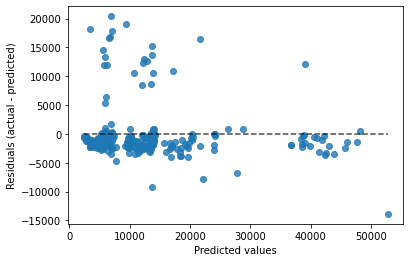

In [26]:
from sklearn.metrics import PredictionErrorDisplay


y_preds = model.predict(X_test)

PredictionErrorDisplay(y_true=y_test,y_pred=y_preds).plot();



In [27]:
# saving model for deployment

from joblib import dump

dump(model,'model.joblib')

['model.joblib']